# Convolutional Neural Networks with CIFAR-10 Dataset

## Objective
In this exercise, you will:
1. Utilize callback functions to halt training when a certain accuracy threshold is met.
2. Integrate convolutional and MaxPooling layers into a neural network to enhance image classification accuracy.
3. Grasp and demonstrate the benefits of convolution and MaxPooling in image classification tasks.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


---

## Step 2: Load and Preprocess the Data
We'll load the CIFAR-10 dataset and then normalize the pixel values.


In [9]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# TODO Normalize the pixel values

train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the shape of the loaded data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)



Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


---

## Step 3: Visualize the Data
Show some samples from the CIFAR-10 dataset.


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


---

## Step 4: Define a Callback
Create a callback to monitor the model's accuracy and halt training when a specified accuracy is achieved.


In [13]:
# TODO define a callback that interrupts training after an accuracy of 90% is reached
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if (logs.get('accuracy') > 0.9):
        print("\nAccuracy of 90% reached - stopping training.\n")
        self.model.stop_training = True

accuracy_callback = AccuracyCallback()

---

## Step 5: Build a Convolutional Neural Network
Construct a neural network that incorporates convolutional and MaxPooling layers.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


---

## Step 6: Train the Model
Train the model using the training data and your callback function


In [18]:
model.fit(train_images, train_labels, epochs=10, callbacks=[accuracy_callback])


Epoch 1/10
1563/1563 [==============================] - 133s 84ms/step - loss: 1.3993 - accuracy: 0.5003
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0258 - accuracy: 0.6375
Epoch 3/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8416 - accuracy: 0.7070
Epoch 4/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.7022 - accuracy: 0.7559
Epoch 5/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.5698 - accuracy: 0.7999
Epoch 6/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.4452 - accuracy: 0.8439
Epoch 7/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.3317 - accuracy: 0.8853
Epoch 8/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.2463 - accuracy: 0.9160
Accuracy of 90% reached - stopping training.

1563/1563 [==============================] - 126s 80ms/step - loss: 0.2464 - accuracy: 0.9160


---

## Step 7: Evaluate the Model
Assess the model using the test data.


---

## Step 8 (Optional): Visualizing the Advantages of Convolution and MaxPooling
Demonstrate the benefits of convolution and MaxPooling. For this, we can extract the outputs from intermediate layers and visualize them. Play around with this to to find out what the model learns.


1/1 [==============================] - 0s 160ms/step


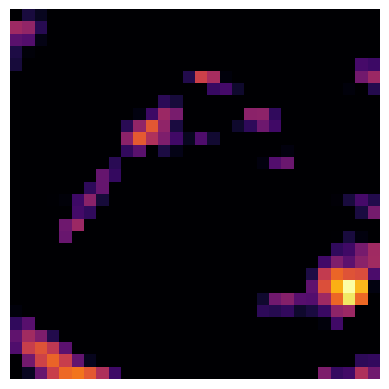

In [19]:
# Extracting outputs from our layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# For the first image in the training set
img = train_images[0]
img = np.expand_dims(img, axis=0)

# Get the feature maps
activations = activation_model.predict(img)

# Visualizing the fourth channel of the output from the first layer (convolution)
plt.imshow(activations[0][0, :, :, 4], cmap='inferno')
plt.axis('off')
plt.show()
